### 1 - Import test data

In [1]:
import pandas as pd
import pandas_ta as ta

df = pd.read_csv("EURUSD_Candlestick_15_M_BID_01.02.2023-17.02.2024.csv")
df["Gmt time"]=df["Gmt time"].str.replace(".000","")
df['Gmt time']=pd.to_datetime(df['Gmt time'],format='%d.%m.%Y %H:%M:%S')
df=df[df.High!=df.Low]
df.set_index("Gmt time", inplace=True, drop=True)

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_5716\2678475820.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Gmt time"]=df["Gmt time"].str.replace(".000","")


In [2]:
df["EMA"]=ta.ema(df.Close, length=200)
macd = ta.macd(df.Close)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = macd.iloc[:,0], macd.iloc[:,1], macd.iloc[:,2]
df['ATR']=ta.atr(df.High, df.Low, df.Close, length=7)
df

,Open,High,Low,Close,Volume,EMA,MACD,MACD_signal,MACD_hist,ATR
Gmt time,,,,,,,,,,
2023-02-01 00:00:00,1.08605,1.08619,1.08583,1.08604,2184.41,NaN,NaN,NaN,NaN,NaN
2023-02-01 00:15:00,1.08604,1.08623,1.08583,1.08609,2373.76,NaN,NaN,NaN,NaN,NaN
2023-02-01 00:30:00,1.08608,1.08637,1.08604,1.08630,1649.21,NaN,NaN,NaN,NaN,NaN
2023-02-01 00:45:00,1.08629,1.08638,1.08606,1.08622,2071.47,NaN,NaN,NaN,NaN,NaN
2023-02-01 01:00:00,1.08622,1.08634,1.08594,1.08607,2021.66,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-02-16 20:45:00,1.07744,1.07770,1.07729,1.07764,3288.91,1.075942,0.000287,-0.000068,0.000355,0.000443
2024-02-16 21:00:00,1.07764,1.07771,1.07747,1.07763,1677.19,1.075959,0.000263,-0.000074,0.000336,0.000414
2024-02-16 21:15:00,1.07763,1.07778,1.07758,1.07776,964.40,1.075977,0.000251,-0.000068,0.000319,0.000384


In [3]:
df.describe()

,Open,High,Low,Close,Volume,EMA,MACD,MACD_signal,MACD_hist,ATR
count,18176.000000,18176.000000,18176.000000,18176.00000,18176.000000,17977.000000,18143.000000,1.814300e+04,1.814300e+04,18169.000000
mean,1.082334,1.082659,1.082006,1.08233,3197.957330,1.082303,-0.000003,-4.154891e-08,-3.455233e-06,0.000673
std,0.016212,0.016204,0.016216,0.01621,3149.302514,0.015705,0.000705,1.986600e-04,6.686884e-04,0.000333
min,1.045240,1.045590,1.044830,1.04525,0.000018,1.053829,-0.004737,-1.607968e-03,-4.221142e-03,0.000130
25%,1.069640,1.069940,1.069348,1.06964,1197.625000,1.069697,-0.000341,-9.698273e-05,-3.328937e-04,0.000421
50%,1.083870,1.084200,1.083595,1.08387,2422.305000,1.083645,0.000003,2.489631e-06,7.465152e-10,0.000611
75%,1.094380,1.094670,1.094070,1.09438,4183.892500,1.093720,0.000315,9.564231e-05,3.022295e-04,0.000838
max,1.127180,1.127560,1.126430,1.12718,35902.279500,1.121117,0.006459,1.475801e-03,5.954582e-03,0.002687


In [4]:
def ema_signal(df, current_candle, backcandles):
    df_slice = df.reset_index().copy()
    # Get the range of candles to consider
    start = max(0, current_candle - backcandles)
    end = current_candle
    relevant_rows = df_slice.iloc[start:end]

    if all(relevant_rows['High'] < relevant_rows['EMA']):
        return 1
    elif all(relevant_rows['Low'] > relevant_rows['EMA']):
        return 2
    else:
        return 0

df=df[-20000:-1]
from tqdm import tqdm
tqdm.pandas()
df.reset_index(inplace=True)
df['EMASignal'] = df.progress_apply(lambda row: ema_signal(df, row.name, 5) if row.name >= 20 else 0, axis=1)

100%|██████████| 18175/18175 [00:22<00:00, 813.01it/s] 
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_5716\1864765725.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMASignal'] = df.progress_apply(lambda row: ema_signal(df, row.name, 5) if row.name >= 20 else 0, axis=1)


In [5]:
def total_signal(df, current_candle, backcandles):
    if (ema_signal(df, current_candle, backcandles)==2 and
        all(df.loc[current_candle - 3:current_candle - 2, "MACD"] < df.loc[current_candle - 3:current_candle - 2, "MACD_signal"]) and
        all(df.loc[current_candle - 1:current_candle, "MACD"] > df.loc[current_candle - 1:current_candle, "MACD_signal"])
        ):
            return 2
    if (ema_signal(df, current_candle, backcandles)==1 and
        all(df.loc[current_candle - 3:current_candle - 2, "MACD"] > df.loc[current_candle - 3:current_candle - 2, "MACD_signal"]) and
        all(df.loc[current_candle - 1:current_candle, "MACD"] < df.loc[current_candle - 1:current_candle, "MACD_signal"])
        ):

            return 1
    return 0
        
df['TotalSignal'] = df.progress_apply(lambda row: total_signal(df, row.name, 7) if row.name != 0 else 0, axis=1)

100%|██████████| 18175/18175 [00:51<00:00, 354.99it/s]
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_5716\3945134384.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSignal'] = df.progress_apply(lambda row: total_signal(df, row.name, 7) if row.name != 0 else 0, axis=1)


In [6]:
df[df.TotalSignal != 0].head(20)

,Gmt time,Open,High,Low,Close,Volume,EMA,MACD,MACD_signal,MACD_hist,ATR,EMASignal,TotalSignal
416,2023-02-07 08:15:00,1.07043,1.07164,1.07025,1.07107,8675.6700,1.078403,-0.000443,-0.000339,-0.000104,0.001072,1,1
963,2023-02-15 01:15:00,1.07409,1.07435,1.07404,1.07424,1833.2900,1.072613,0.000105,0.000074,0.000031,0.000410,2,2
1266,2023-02-20 05:00:00,1.06865,1.06875,1.06836,1.06856,1908.2500,1.067656,0.000102,0.000071,0.000031,0.000417,2,2
1316,2023-02-20 17:30:00,1.06866,1.06876,1.06863,1.06867,612.1600,1.068064,0.000042,0.000033,0.000009,0.000436,2,2
1416,2023-02-21 18:30:00,1.06461,1.06473,1.06384,1.06419,3380.5400,1.067209,-0.000346,-0.000253,-0.000093,0.000975,1,1
1474,2023-02-22 09:00:00,1.06454,1.06459,1.06354,1.06444,4431.8200,1.066370,-0.000217,-0.000149,-0.000068,0.000715,1,1
1570,2023-02-23 09:00:00,1.06059,1.06062,1.06003,1.06013,4614.1400,1.063659,-0.000294,-0.000216,-0.000078,0.000713,1,1
1660,2023-02-24 07:30:00,1.05903,1.05950,1.05883,1.05929,3710.0100,1.061368,-0.000137,-0.000102,-0.000035,0.000501,1,1
1743,2023-02-27 04:15:00,1.05445,1.05457,1.05434,1.05441,1477.3900,1.058124,-0.000178,-0.000124,-0.000054,0.000421,1,1
1859,2023-02-28 09:15:00,1.06240,1.06240,1.06160,1.06188,3462.3800,1.058698,0.000577,0.000421,0.000155,0.000918,2,2


In [7]:
import numpy as np
def pointpos(x):
    if x['TotalSignal']==2:
        return x['Low']-1e-3
    elif x['TotalSignal']==1:
        return x['High']+1e-3
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_5716\2345118794.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)


In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
st=1100
dfpl = df[st:st+350]
#dfpl.reset_index(inplace=True)
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="entry")

fig.show()

In [9]:
df

,Gmt time,Open,High,Low,Close,Volume,EMA,MACD,MACD_signal,MACD_hist,ATR,EMASignal,TotalSignal,pointpos
0,2023-02-01 00:00:00,1.08605,1.08619,1.08583,1.08604,2184.41,NaN,NaN,NaN,NaN,NaN,0,0,NaN
1,2023-02-01 00:15:00,1.08604,1.08623,1.08583,1.08609,2373.76,NaN,NaN,NaN,NaN,NaN,0,0,NaN
2,2023-02-01 00:30:00,1.08608,1.08637,1.08604,1.08630,1649.21,NaN,NaN,NaN,NaN,NaN,0,0,NaN
3,2023-02-01 00:45:00,1.08629,1.08638,1.08606,1.08622,2071.47,NaN,NaN,NaN,NaN,NaN,0,0,NaN
4,2023-02-01 01:00:00,1.08622,1.08634,1.08594,1.08607,2021.66,NaN,NaN,NaN,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,2024-02-16 20:30:00,1.07762,1.07774,1.07739,1.07744,2175.50,1.075925,0.000312,-0.000059,0.000372,0.000449,2,0,NaN
18171,2024-02-16 20:45:00,1.07744,1.07770,1.07729,1.07764,3288.91,1.075942,0.000287,-0.000068,0.000355,0.000443,2,0,NaN
18172,2024-02-16 21:00:00,1.07764,1.07771,1.07747,1.07763,1677.19,1.075959,0.000263,-0.000074,0.000336,0.000414,2,0,NaN
18173,2024-02-16 21:15:00,1.07763,1.07778,1.07758,1.07776,964.40,1.075977,0.000251,-0.000068,0.000319,0.000384,2,0,NaN


In [10]:
dfopt = df[:]
def SIGNAL():
    return dfopt.TotalSignal

In [11]:
from backtesting import Strategy
from backtesting import Backtest

class MyStrat(Strategy):
    mysize = 3000
    slcoef = 1.1
    TPSLRatio = 1.5
    #rsi_length = 16
    
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)
        #df['RSI']=ta.rsi(df.Close, length=self.rsi_length)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio

        # if len(self.trades)>0:
        #     if self.trades[-1].is_long and self.data.RSI[-1]>=90:
        #         self.trades[-1].close()
        #     elif self.trades[-1].is_short and self.data.RSI[-1]<=10:
        #         self.trades[-1].close()
        
        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)
        
        elif self.signal1==1 and len(self.trades)==0:         
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(dfopt, MyStrat, cash=250, margin=1/30, commission=0.00)
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 26)],
                    TPSLRatio=[i/10 for i in range(10, 26)],
                    #rsi_length=[5, 8, 10, 12, 14, 16], 
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_5716\3265697547.py:36: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



  0%|          | 0/16 [00:00<?, ?it/s]

Start                                     0.0
End                                   18174.0
Duration                              18174.0
Exposure Time [%]                   14.283356
Equity Final [$]                   302.344586
Equity Peak [$]                    322.220633
Return [%]                          20.937834
Buy & Hold Return [%]               -0.766086
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -26.914944
Avg. Drawdown [%]                   -3.058389
Max. Drawdown Duration                 5144.0
Avg. Drawdown Duration             499.060606
# Trades                                107.0
Win Rate [%]                        42.056075
Best Trade [%]                       0.648114
Worst Trade [%]                     -0.513346
Avg. Trade [%]                    

In [12]:
stats["_strategy"]

<Strategy MyStrat(slcoef=2.3,TPSLRatio=1.6)>

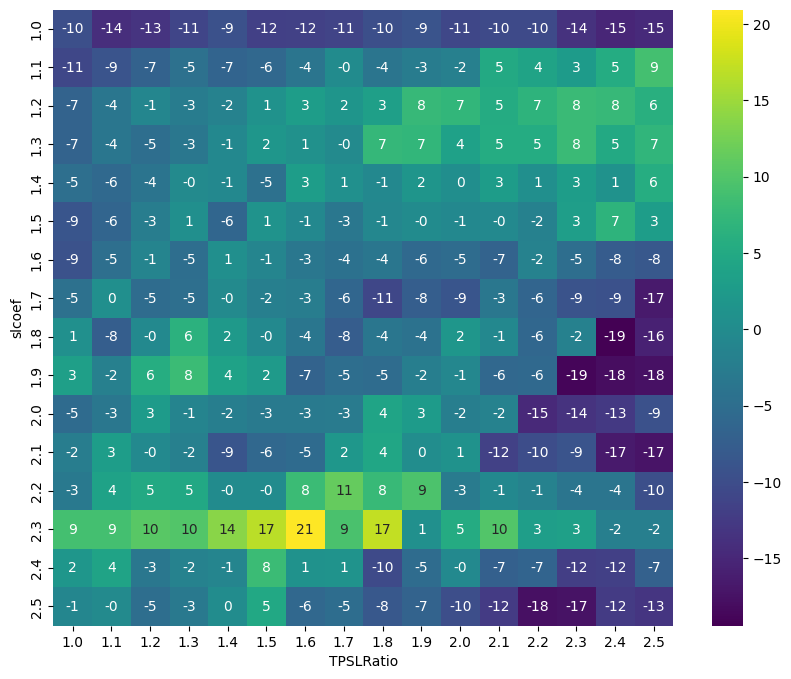

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert multiindex series to dataframe
heatmap_df = heatmap.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()

In [14]:
class MyStrat(Strategy):
    mysize = 3000
    slcoef = 2.3
    TPSLRatio = 1.6
    #rsi_length = 16
    
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)
        #df['RSI']=ta.rsi(df.Close, length=self.rsi_length)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio

        # if len(self.trades)>0:
        #     if self.trades[-1].is_long and self.data.RSI[-1]>=90:
        #         self.trades[-1].close()
        #     elif self.trades[-1].is_short and self.data.RSI[-1]<=10:
        #         self.trades[-1].close()
        
        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)
        
        elif self.signal1==1 and len(self.trades)==0:         
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(dfopt, MyStrat, cash=250, margin=1/30, commission=0.00)
stats = bt.run()

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_5716\1612635680.py:33: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



In [15]:
stats

Start                                     0.0
End                                   18174.0
Duration                              18174.0
Exposure Time [%]                   14.283356
Equity Final [$]                   302.344586
Equity Peak [$]                    322.220633
Return [%]                          20.937834
Buy & Hold Return [%]               -0.766086
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -26.914944
Avg. Drawdown [%]                   -3.058389
Max. Drawdown Duration                 5144.0
Avg. Drawdown Duration             499.060606
# Trades                                107.0
Win Rate [%]                        42.056075
Best Trade [%]                       0.648114
Worst Trade [%]                     -0.513346
Avg. Trade [%]                    

In [16]:
bt.plot()

Row(id='1455', ...)